# GitHub API REST v3 -> コントリビュートのばらつき
ここではコントリビュート（貢献度）のばらつきを確認します。

## リポジトリの確認と指定方法
例えば以下の条件で調べると, microsoft/vscodeと出てきます。
- microsoft -> owner
- vscode -> repo

https://github.com/search?q=vscode 

In [1]:
# input values
owner = "microsoft"
repo = "vscode"

print("[owner]{0} [repo]{1}について出力します。".format(owner, repo))

[owner]microsoft [repo]vscodeについて出力します。


## ライブラリのインポート

In [2]:
# Libraries
import requests
import json
import pprint
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt

## original Libraries
import config_manager as cnf
import github_api.github_api_manager as gapi

## ユーザー情報の取得
- ユーザー名とパスワードを取得します。
- ユーザー情報は、config\setting.cnfに設定します。

In [3]:
# load config file
cnf_data = cnf.confg_manager()
cnf_data.load()
username, userpassword = cnf_data.get_userparam()

# create github api object
gapi_ctrl = gapi.github_api_manager(username, userpassword)

## GitHub APIを叩いてContributorsの情報を取得します
ページで分けて取らないといけないようなので、
データの取得数が0になるまで取り続けます。

In [4]:

# create repository api
github_api = "/repos/{owner}/{repo}/contributors?page={0}&per_page={1}" \
    .replace("{owner}", owner).replace("{repo}", repo)

page = 0
per_page = 30
ret_json = gapi_ctrl.get_json(github_api.format(page, per_page))

# create Empty dataframe
df = pd.DataFrame(index=[], columns=ret_json[0].keys())

while len(ret_json) > 0:
    # apend data
    for k in ret_json:
        df = df.append(pd.DataFrame.from_dict(k, orient='index').T)

    page = page + 1
    ret_json = gapi_ctrl.get_json(github_api.format(page, per_page))

GET https://api.github.com/repos/microsoft/vscode/contributors?page=0&per_page=30
GET https://api.github.com/repos/microsoft/vscode/contributors?page=1&per_page=30
GET https://api.github.com/repos/microsoft/vscode/contributors?page=2&per_page=30
GET https://api.github.com/repos/microsoft/vscode/contributors?page=3&per_page=30
GET https://api.github.com/repos/microsoft/vscode/contributors?page=4&per_page=30
GET https://api.github.com/repos/microsoft/vscode/contributors?page=5&per_page=30
GET https://api.github.com/repos/microsoft/vscode/contributors?page=6&per_page=30
GET https://api.github.com/repos/microsoft/vscode/contributors?page=7&per_page=30
GET https://api.github.com/repos/microsoft/vscode/contributors?page=8&per_page=30
GET https://api.github.com/repos/microsoft/vscode/contributors?page=9&per_page=30
GET https://api.github.com/repos/microsoft/vscode/contributors?page=10&per_page=30
GET https://api.github.com/repos/microsoft/vscode/contributors?page=11&per_page=30
GET https://ap

## 値のキャストを行います
- ざっくり情報を見ておきます

In [5]:
# cast int
df['contributions'] = df['contributions'].astype(float)

# information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401 entries, 0 to 0
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   login                401 non-null    object 
 1   id                   401 non-null    object 
 2   node_id              401 non-null    object 
 3   avatar_url           401 non-null    object 
 4   gravatar_id          401 non-null    object 
 5   url                  401 non-null    object 
 6   html_url             401 non-null    object 
 7   followers_url        401 non-null    object 
 8   following_url        401 non-null    object 
 9   gists_url            401 non-null    object 
 10  starred_url          401 non-null    object 
 11  subscriptions_url    401 non-null    object 
 12  organizations_url    401 non-null    object 
 13  repos_url            401 non-null    object 
 14  events_url           401 non-null    object 
 15  received_events_url  401 non-null    objec

# Contributorsをヒストグラムで表示します
偏りすぎていてよくわかりません。

(array([353.,   8.,  12.,   6.,   0.,   0.,   0.,   2.,   0.,   2.,   0.,
          2.,   0.,   2.,   0.,   0.,   2.,   2.,   4.,   0.,   0.,   0.,
          0.,   0.,   2.,   2.,   0.,   0.,   0.,   2.]),
 array([2.0000e+00, 2.8720e+02, 5.7240e+02, 8.5760e+02, 1.1428e+03,
        1.4280e+03, 1.7132e+03, 1.9984e+03, 2.2836e+03, 2.5688e+03,
        2.8540e+03, 3.1392e+03, 3.4244e+03, 3.7096e+03, 3.9948e+03,
        4.2800e+03, 4.5652e+03, 4.8504e+03, 5.1356e+03, 5.4208e+03,
        5.7060e+03, 5.9912e+03, 6.2764e+03, 6.5616e+03, 6.8468e+03,
        7.1320e+03, 7.4172e+03, 7.7024e+03, 7.9876e+03, 8.2728e+03,
        8.5580e+03]),
 <a list of 30 Patch objects>)

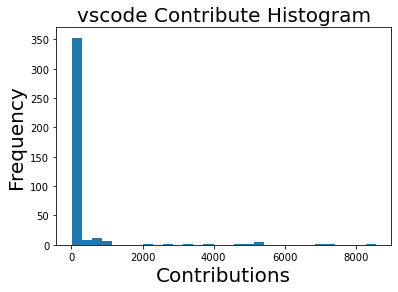

In [6]:

plt.title("{0} Contribute Histogram".format(repo), fontsize=20)  # title
plt.xlabel("Contributions", fontsize=20)            # x-axis label
plt.ylabel("Frequency", fontsize=20)      # y-axis label

# show histogram bins=30
plt.hist(df.contributions, bins=30)

# 対数変換をかけてヒストグラム表示します
ばらつきが見やすくなりました。

(array([36., 73., 56., 59., 27., 21., 22., 12.,  9., 10.,  7.,  2.,  4.,
         5.,  4.,  2.,  2.,  2.,  8.,  0.,  4., 10.,  4.,  0.,  2.,  2.,
         2.,  4.,  6.,  6.]),
 array([ 1.        ,  1.40210193,  1.80420386,  2.2063058 ,  2.60840773,
         3.01050966,  3.41261159,  3.81471352,  4.21681546,  4.61891739,
         5.02101932,  5.42312125,  5.82522319,  6.22732512,  6.62942705,
         7.03152898,  7.43363091,  7.83573285,  8.23783478,  8.63993671,
         9.04203864,  9.44414057,  9.84624251, 10.24834444, 10.65044637,
        11.0525483 , 11.45465024, 11.85675217, 12.2588541 , 12.66095603,
        13.06305796]),
 <a list of 30 Patch objects>)

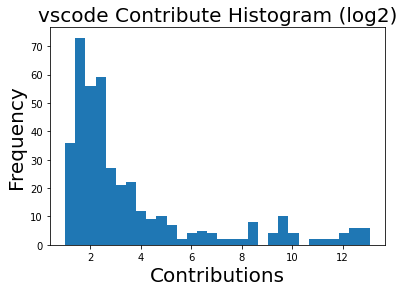

In [7]:
plt.title("{0} Contribute Histogram (log2)".format(repo), fontsize=20)  # title
plt.xlabel("Contributions", fontsize=20)            # x-axis label
plt.ylabel("Frequency", fontsize=20)      # y-axis label
# show histogram for log2 bins=30
plt.hist(np.log2(df.contributions), bins=30)